In [144]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import math

In [3]:
data = pd.read_csv('portland_transit_data.csv')

In [4]:
data.head()

,Month,Riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('portland_transit_data.csv',parse_dates=[0], index_col='Month', date_parser=dateparse)

In [6]:
data.head()

,Riders
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [7]:
ts = data['Riders']

In [8]:
ts.head()

Month
1960-01-01    648
1960-02-01    646
1960-03-01    639
1960-04-01    654
1960-05-01    630
Name: Riders, dtype: int64

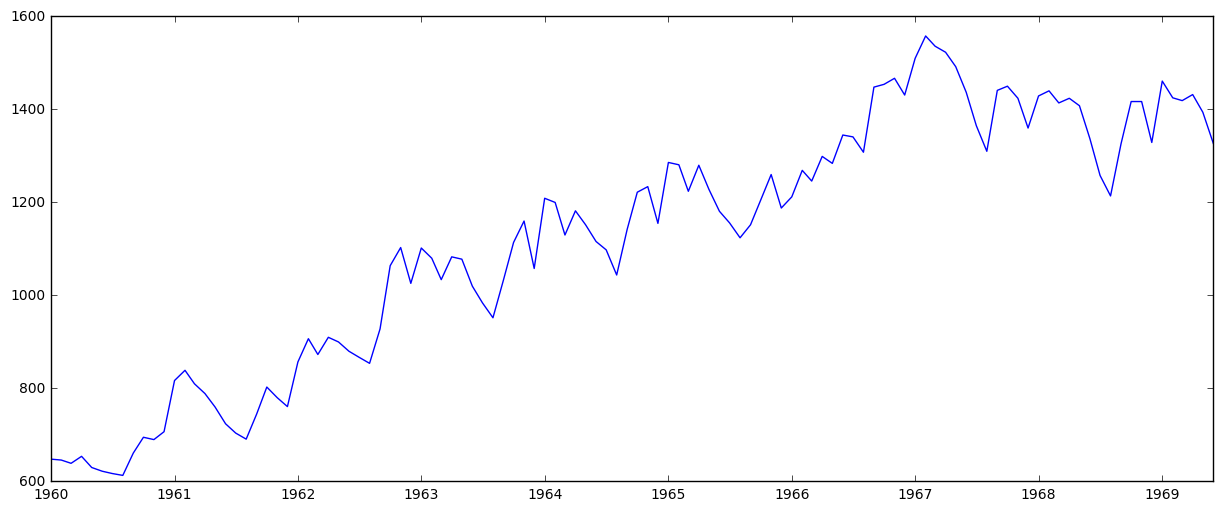

In [9]:
plt.plot(ts)

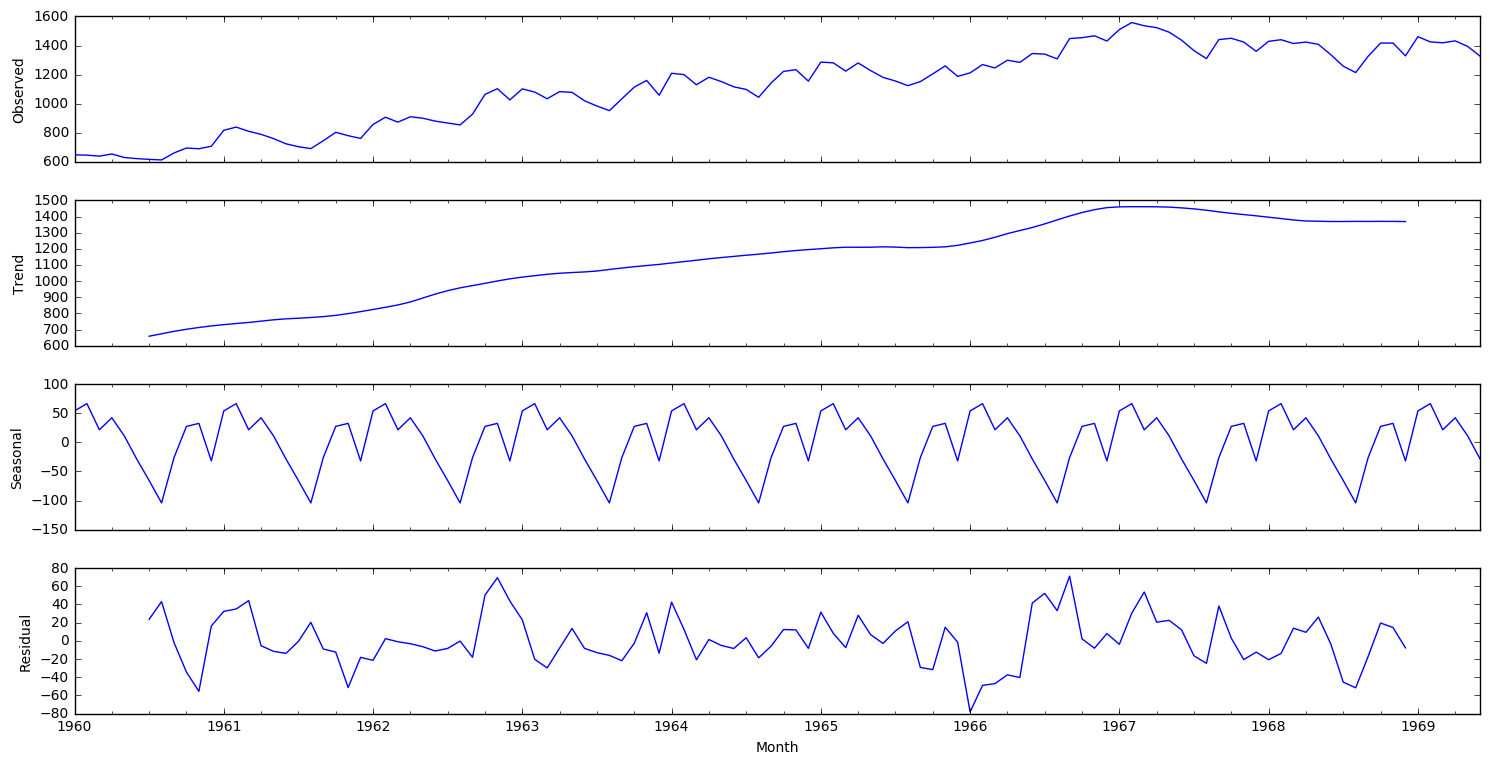

In [10]:
decomposition = seasonal_decompose(ts, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


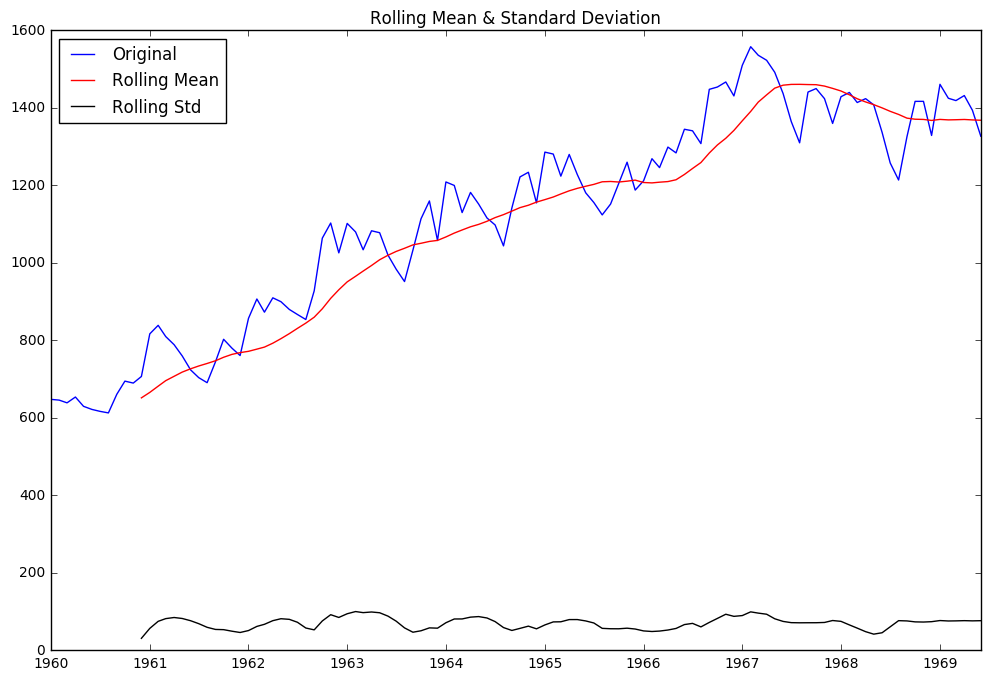

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (5%)             -2.890611
Critical Value (1%)             -3.496818
Critical Value (10%)            -2.582277
dtype: float64


In [12]:
test_stationarity(ts)

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


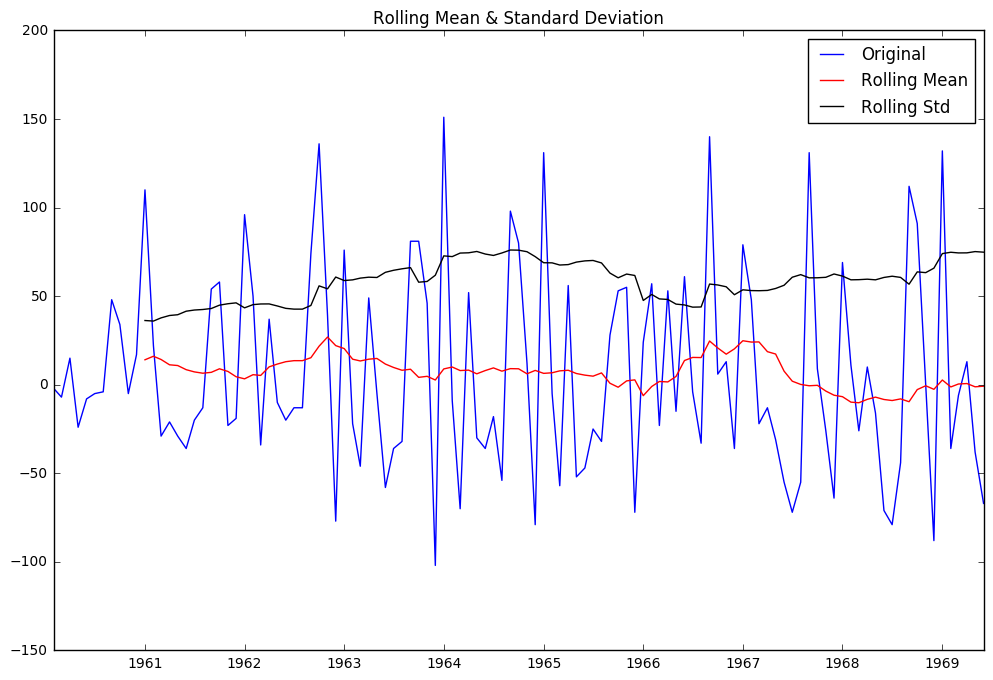

Results of Dickey-Fuller Test:
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (5%)             -2.890611
Critical Value (1%)             -3.496818
Critical Value (10%)            -2.582277
dtype: float64


In [13]:
first_diff = ts - ts.shift(1)
first_diff.dropna(inplace=True)
test_stationarity(first_diff)

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


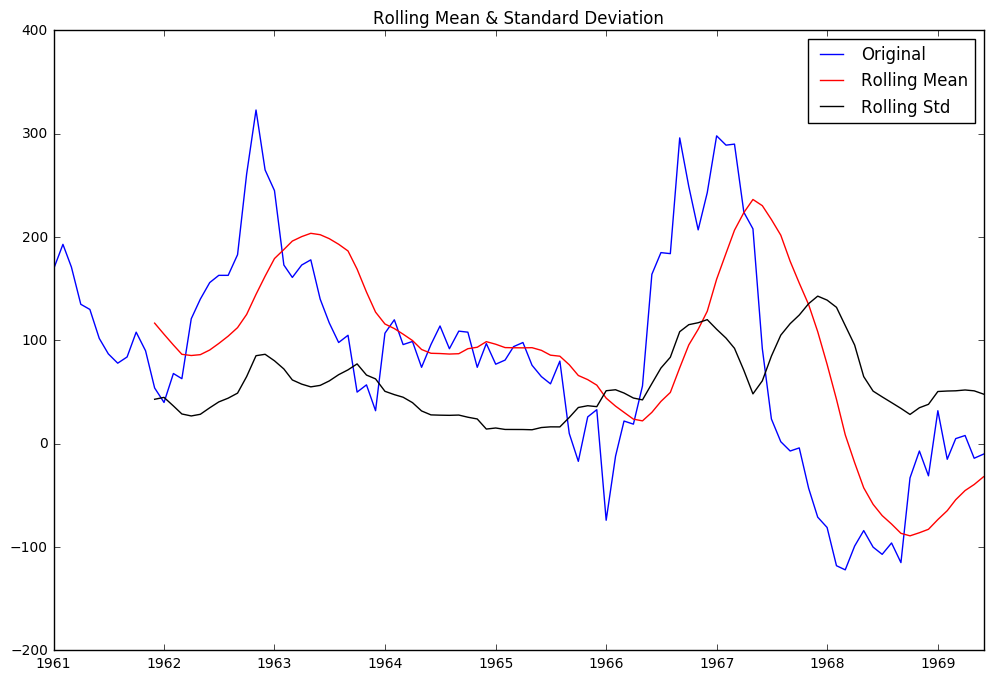

Results of Dickey-Fuller Test:
Test Statistic                 -2.469741
p-value                         0.123011
#Lags Used                      3.000000
Number of Observations Used    98.000000
Critical Value (5%)            -2.891516
Critical Value (1%)            -3.498910
Critical Value (10%)           -2.582760
dtype: float64


In [14]:
seasonal_diff = ts - ts.shift(12)
seasonal_diff.dropna(inplace=True)
test_stationarity(seasonal_diff)

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


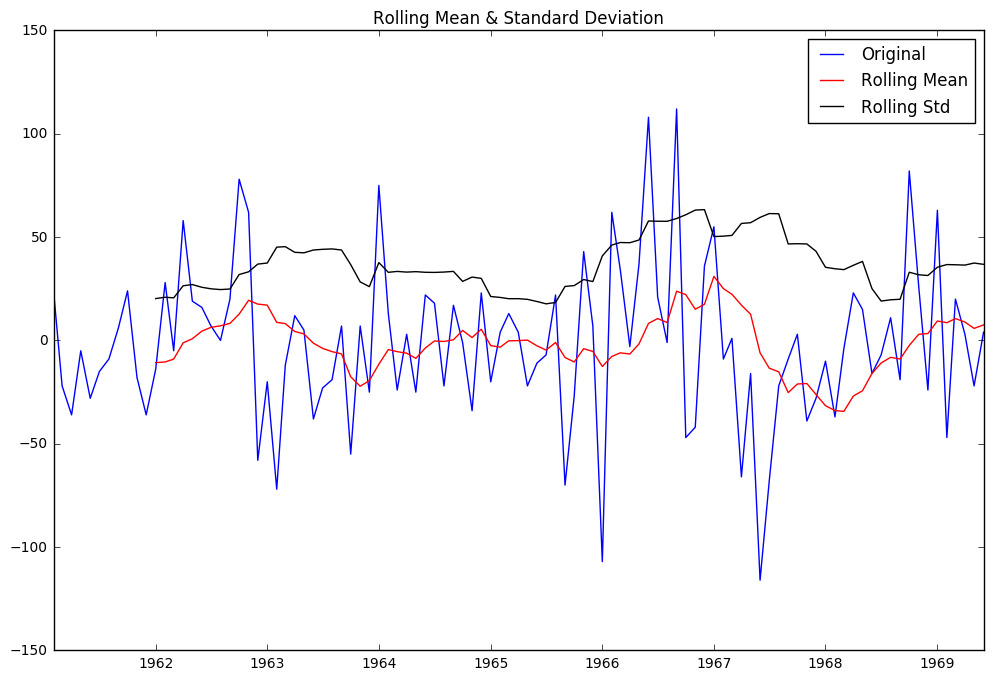

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (5%)           -2.890906e+00
Critical Value (1%)           -3.497501e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [15]:
seasonal_first_diff = first_diff - first_diff.shift(12)
seasonal_first_diff.dropna(inplace = True)
test_stationarity(seasonal_first_diff)

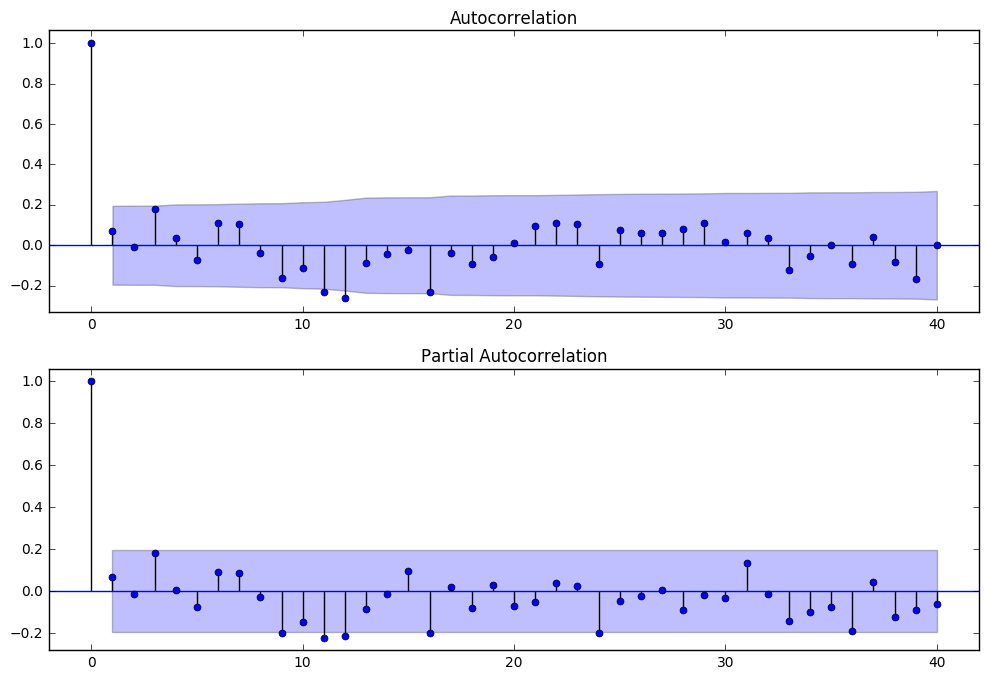

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_first_diff, lags=40, ax=ax2)

In [230]:
mod1 = sm.tsa.statespace.SARIMAX(ts, trend='n', order=(0,0,0), seasonal_order=(1,2,1,12))
results1 = mod1.fit()
mod2 = sm.tsa.statespace.SARIMAX(ts, trend='n', order=(0,1,0), seasonal_order=(0,2,1,12))
results2 = mod2.fit()
print results1.aic

1126.84650684


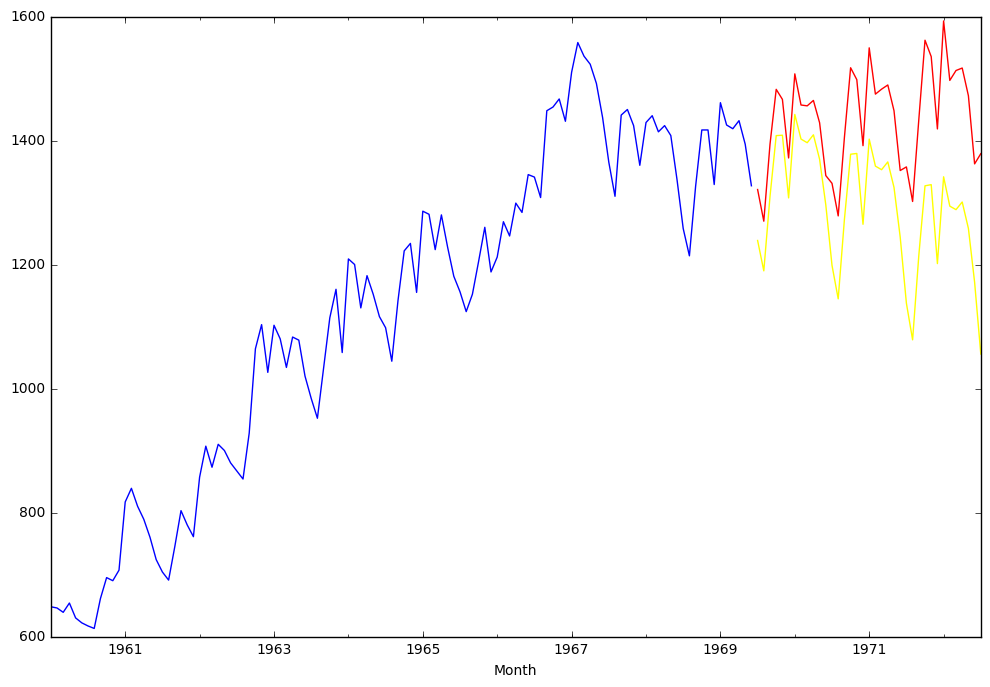

In [231]:
forecast1 = results1.predict(start=114, end=150, dynamic=True)
forecast2 = results2.predict(start=114, end=150, dynamic=True)
ts.plot(figsize=(12,8))
forecast1.plot(color='red')
forecast2.plot(color='yellow')

In [ ]:
start = datetime.datetime.strptime('1982-07-01', '%Y-%m-%d')
date_list = [start + relativedelta(months=x) for x in range(0,12)]
future = pd.DataFrame(index=date_list, columns=)

In [82]:
ts.head()

Month
1960-01-01    648
1960-02-01    646
1960-03-01    639
1960-04-01    654
1960-05-01    630
Name: Riders, dtype: int64

In [75]:
print results2.aic

881.865818045


In [217]:
fit = sm.tsa.statespace.SARIMAX(seasonal_first_diff, trend='n', order=(0,1,1), seasonal_order=(2,2,1,12)).fit()
print fit.aic

875.338287504


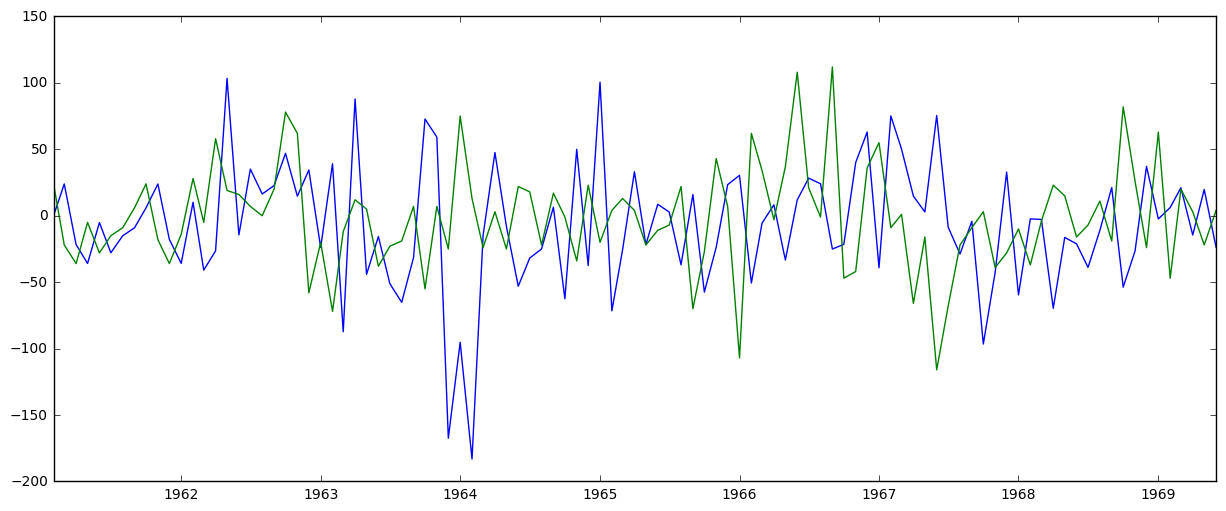

In [218]:
ts_log = np.log(ts)
pred_diff = pd.Series(fit.fittedvalues, copy=True)
plt.plot(pred_diff)
plt.plot(seasonal_first_diff)
pred_diff_cumsum = pred_diff.cumsum()
# plt.plot(pred_diff_cumsum)
# pred_log = pd.Series(ts_log.ix[0], index=ts_log.index)
# pred_log = pred_log.add(pred_diff_cumsum, fill_value=0)
# pred = np.exp(pred_log)
# pred

In [226]:
fit2 = sm.tsa.statespace.SARIMAX(ts, trend='n', order=(0,2,1), seasonal_order=(1,2,1,12)).fit()
print fit2.bic

950.730433832


In [220]:
def test_arima(orders, x):
    order = orders[:3]
    seasonal_order = orders[3:]
    seasonal_order = np.insert(seasonal_order, 3, 12)
    try:
        fit = sm.tsa.statespace.SARIMAX(x, trend='n', order=order, seasonal_order=seasonal_order).fit()
        if math.isnan(fit.aic):
            return float('inf')
        return fit.bic
    except:
        return float('inf')
        

In [228]:
from scipy.optimize import brute
grid = (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
res = brute(test_arima, grid, args=(ts,), finish=None, full_output=True)

/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wills/Envs/pyDataMining/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning

In [229]:
res

(array([ 0.,  1.,  0.,  0.,  2.,  1.]),
 946.79978437322995,
 array([[[[[[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]]],
 
 
 
          [[[[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]],
 
            [[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]]],
 
 
           [[[0, 0, 0],
